In [21]:
import pandas as pd

In [32]:
data_habitacion_1 = pd.read_csv('data/Habitación_export_202304291501.csv')
data_habitacion_2 = pd.read_csv('data/Habitación_export_202305101103.csv')

data_salon_1 = pd.read_csv('data/Salón_export_202304291343.csv')
data_salon_2 = pd.read_csv('data/Salón_export_202305101101.csv')

In [33]:
def cambiar_nombres_columnas(dataset, mapeo_nombres):
    """
    Cambia los nombres de las columnas de un dataset según un mapeo dado.

    Args:
        dataset (pandas.DataFrame): El dataset al que se le cambiarán los nombres de las columnas.
        mapeo_nombres (dict): Un diccionario donde las claves son los nombres actuales de las columnas
                              y los valores son los nuevos nombres de las columnas.

    Returns:
        pandas.DataFrame: El dataset con los nombres de las columnas cambiados.
    """
    dataset.rename(columns=mapeo_nombres, inplace=True)
    dataset.set_index('Registro_temporal', inplace=True)
    return dataset

In [34]:
# Diccionario de mapeo de nombres de columnas
mapeo_nombres = {
    'Registro temporal para frecuencia de muestreo cada 1 min min': 'Registro_temporal',
    ' Temperatura_Celsius': 'Temperatura_Celsius',
    'Humedad_relativa': 'Humedad_relativa[%]'
}

In [35]:
cambiar_nombres_columnas(dataset=data_habitacion_1, mapeo_nombres = mapeo_nombres)
cambiar_nombres_columnas(dataset=data_habitacion_2, mapeo_nombres = mapeo_nombres)
cambiar_nombres_columnas(dataset=data_salon_1, mapeo_nombres = mapeo_nombres)
cambiar_nombres_columnas(dataset=data_salon_2, mapeo_nombres = mapeo_nombres)

,Temperatura_Celsius,Humedad_relativa[%]
Registro_temporal,,
2023-04-29 13:44:00,19.8,56.6
2023-04-29 13:45:00,19.8,56.9
2023-04-29 13:46:00,19.8,56.6
2023-04-29 13:47:00,19.8,56.6
2023-04-29 13:48:00,19.8,56.9
...,...,...
2023-05-10 10:57:00,20.6,45.6
2023-05-10 10:58:00,20.6,45.7
2023-05-10 10:59:00,20.6,45.9


In [36]:
habitacion = pd.concat([data_habitacion_1, data_habitacion_2])
salon = pd.concat([data_salon_1, data_salon_2])

In [37]:
habitacion = habitacion.reset_index()
habitacion

,Registro_temporal,Temperatura_Celsius,Humedad_relativa[%]
0,2023-03-05 23:01:00,16.0,76.6
1,2023-03-05 23:02:00,17.3,67.6
2,2023-03-05 23:03:00,17.7,65.1
3,2023-03-05 23:04:00,18.1,64.5
4,2023-03-05 23:05:00,18.3,63.6
...,...,...,...
65597,2023-05-10 10:59:00,20.8,46.1
65598,2023-05-10 11:00:00,20.8,46.0
65599,2023-05-10 11:01:00,20.8,45.9
65600,2023-05-10 11:02:00,20.8,45.9


In [38]:
salon = salon.reset_index()
salon

,Registro_temporal,Temperatura_Celsius,Humedad_relativa[%]
0,2023-03-05 23:00:00,14.0,79.7
1,2023-03-05 23:01:00,15.3,74.8
2,2023-03-05 23:02:00,16.0,71.8
3,2023-03-05 23:03:00,16.5,69.6
4,2023-03-05 23:04:00,16.9,67.6
...,...,...,...
65625,2023-05-10 10:57:00,20.6,45.6
65626,2023-05-10 10:58:00,20.6,45.7
65627,2023-05-10 10:59:00,20.6,45.9
65628,2023-05-10 11:00:00,20.6,46.3


In [41]:
# Convertir la columna "Registro_temporal" al formato de fecha y hora
salon['Registro_temporal'] = pd.to_datetime(salon['Registro_temporal'], format='%Y-%m-%d %H:%M:%S')
habitacion['Registro_temporal'] = pd.to_datetime(habitacion['Registro_temporal'], format='%Y-%m-%d %H:%M:%S')

<AxesSubplot: xlabel='Registro_temporal'>

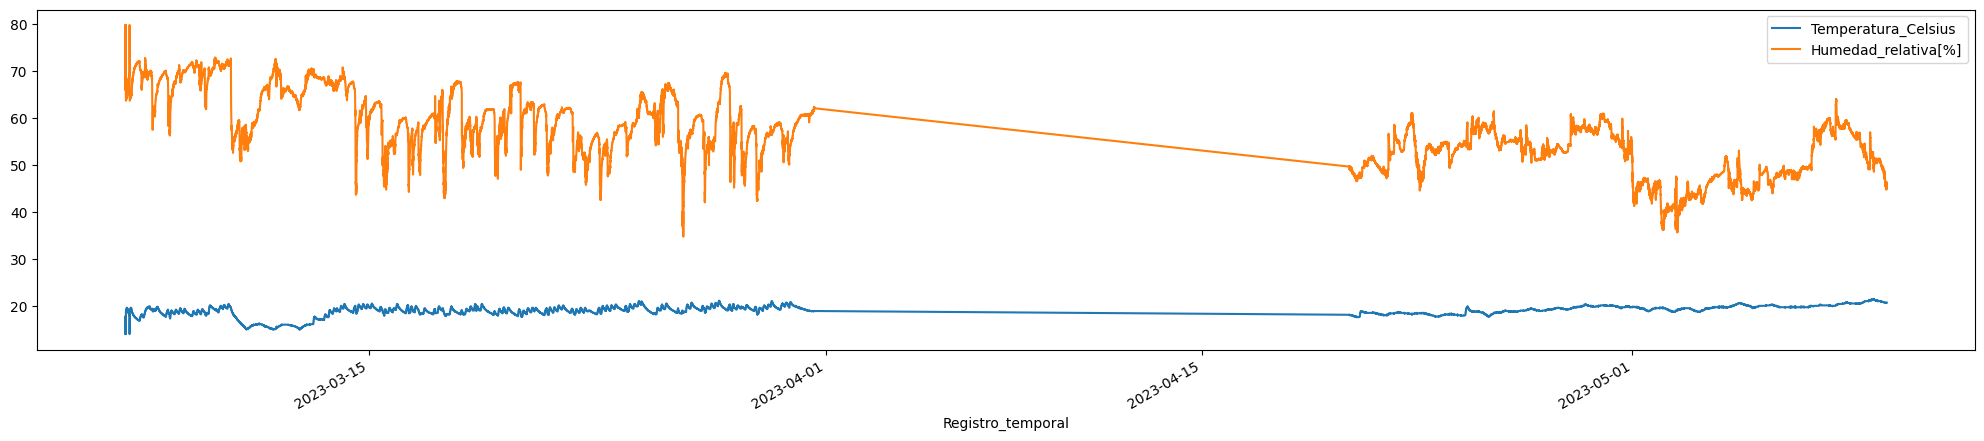

In [42]:
salon.plot(x='Registro_temporal',figsize=(25,5), fontsize=10)

<AxesSubplot: xlabel='Registro_temporal'>

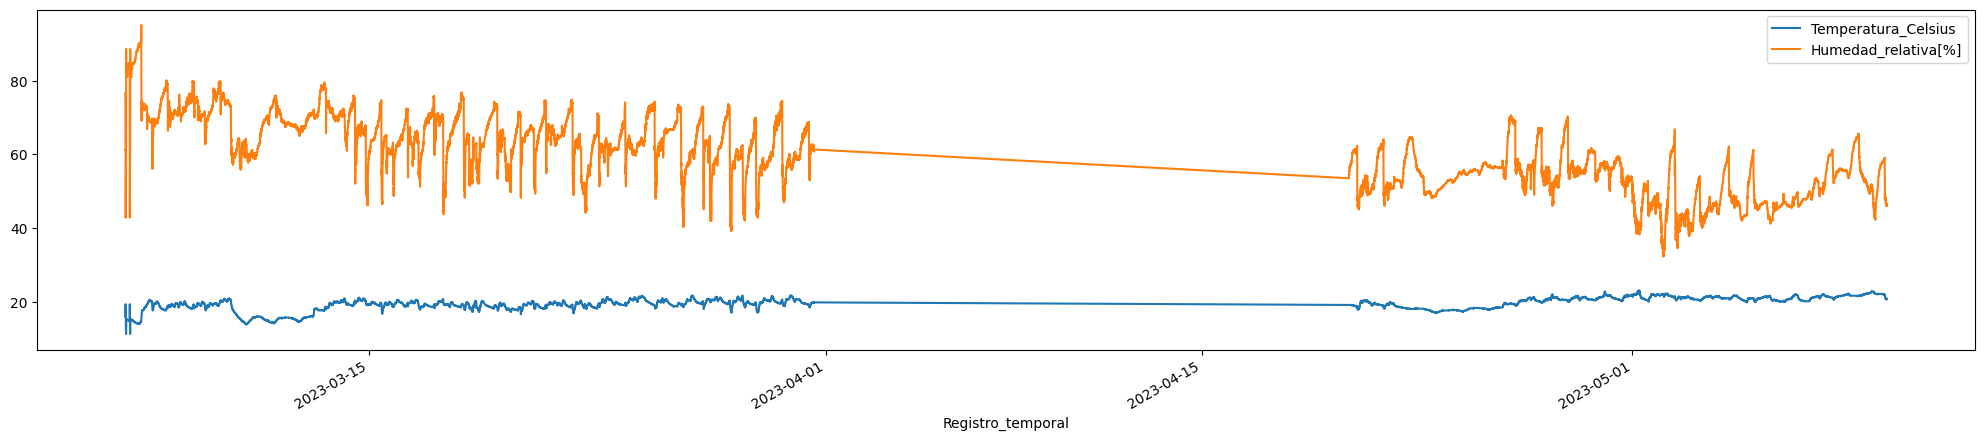

In [43]:
habitacion.plot(x='Registro_temporal',figsize=(25,5), fontsize=10)

In [12]:
habitacion.to_parquet('data/output/habitacion.parquet')
salon.to_parquet('data/output/salon.parquet')